### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment =None

In [2]:
import os
files = os.listdir()
files

['.ipynb_checkpoints',
 'aisles.csv',
 'departments.csv',
 'orders.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'products.csv',
 'sample_submission.csv',
 'Untitled.ipynb']

In [3]:
cwd = os.getcwd()
cwd

'D:\\Kaggle Data Sets\\Insta Cart Dataset'

In [4]:
order_products__prior_df = pd.read_csv('order_products__prior.csv')

In [5]:
order_products_train_df = pd.read_csv('order_products__train.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')

In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
departments_df .head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
count = orders_df.eval_set.value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Text(0.5,1,'Count of rows in each dataset')

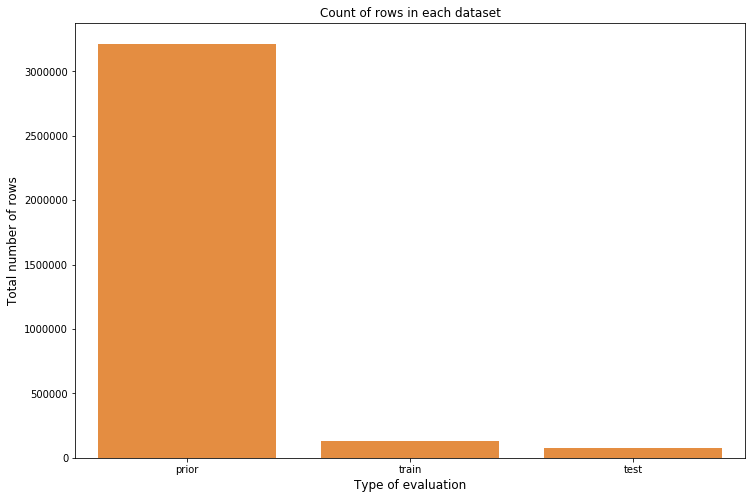

In [13]:
plt.figure(figsize = (12,8))

sns.barplot(count.index, count.values,alpha = 0.9, color =color[1])
plt.ylabel('Total number of rows', fontsize = 12)
plt.xlabel('Type of evaluation', fontsize = 12)
plt.title('Count of rows in each dataset', fontsize = 12)

### Function to get unqiue count of eval set

In [14]:
def get_unique_count(x):
    return len(np.unique(x))

count = orders_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

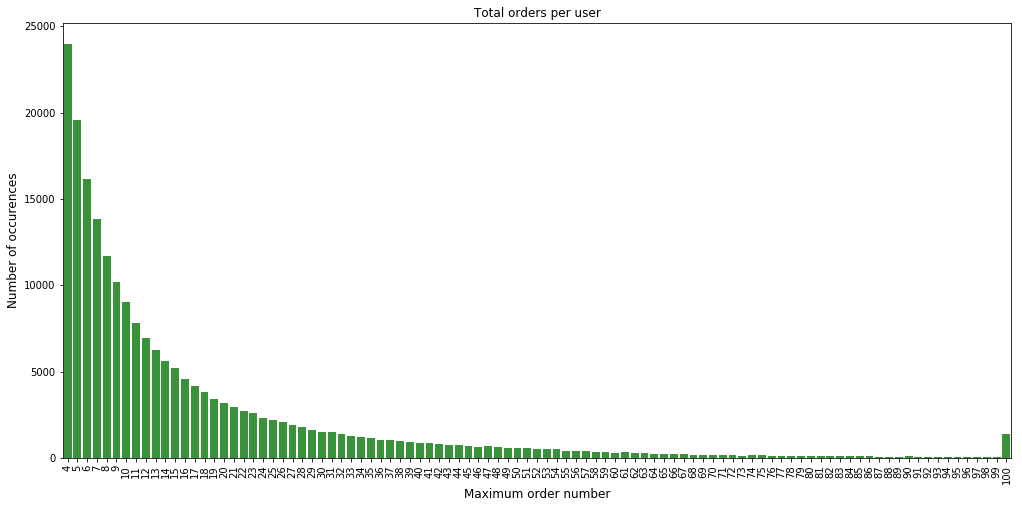

In [15]:
count = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
#count.head()
count = count.order_number.value_counts()
plt.figure(figsize = (17,8))
sns.barplot(count.index, count.values,alpha = 1, color = color[2])
plt.ylabel('Number of occurences', fontsize = (12))
plt.xlabel('Maximum order number', fontsize = (12))
plt.title('Total orders per user', fontsize = (12))
plt.xticks(rotation = 'vertical')
plt.show()

#### Ordering habit in a week

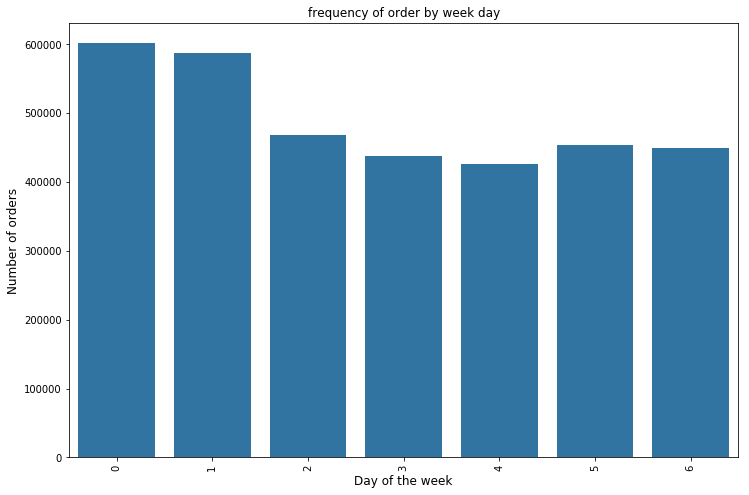

In [16]:
plt.figure(figsize = (12,8))
sns.countplot(x ='order_dow', data = orders_df, color = color[0])
plt.ylabel('Number of orders', fontsize  = 12)
plt.xlabel('Day of the week', fontsize = 12)
plt.title('frequency of order by week day', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

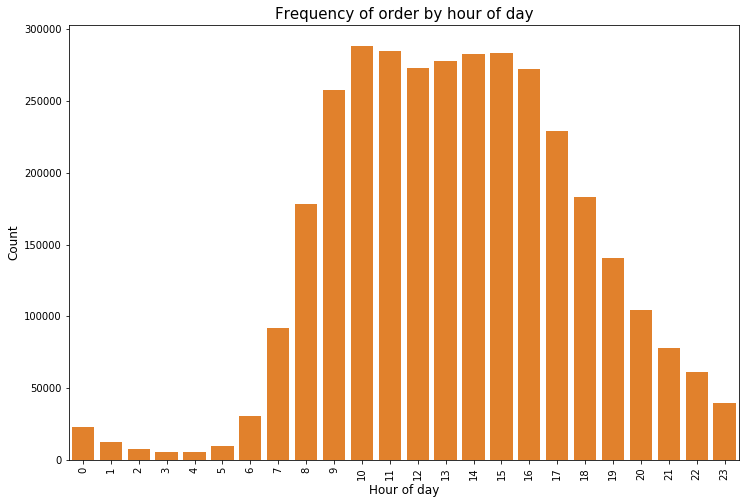

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

In [18]:
comb_df = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
comb_df.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [19]:
comb_df = comb_df.pivot('order_dow','order_hour_of_day','order_number')
comb_df

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


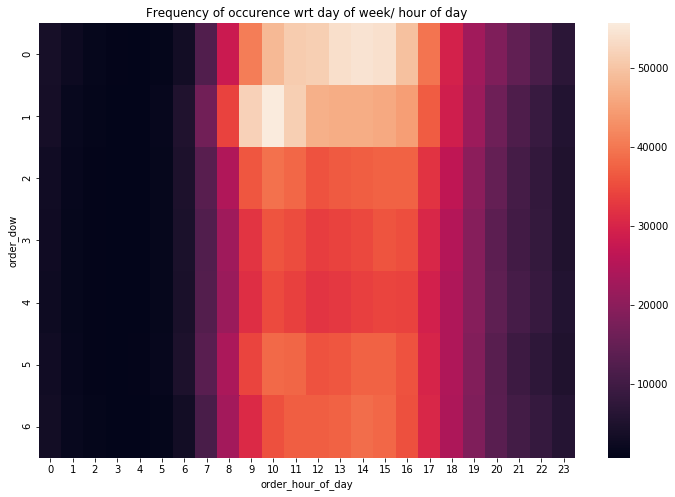

In [20]:
plt.figure(figsize = (12,8))
sns.heatmap(comb_df)
plt.title('Frequency of occurence wrt day of week/ hour of day')
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

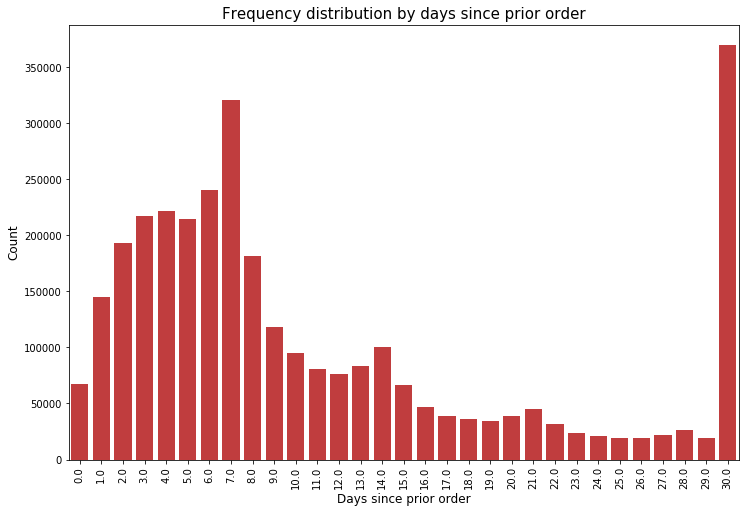

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

In [22]:
order_products_prior_df.reordered.sum()

19126536

In [23]:
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [24]:
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.



No re-ordered products:

Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.

In [25]:
comb_df = order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
comb_df.head(10)

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0
5,7,0
6,8,1
7,9,10
8,10,8
9,11,5


In [26]:
comb_df['reordered'].loc[comb_df['reordered']>1] = 1
comb_df.reordered.value_counts()/comb_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [27]:
comb_df = order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
comb_df['reordered'].loc[comb_df['reordered']>1] = 1
comb_df.reordered.value_counts()/comb_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

Now let us see the number of products bought in each order.

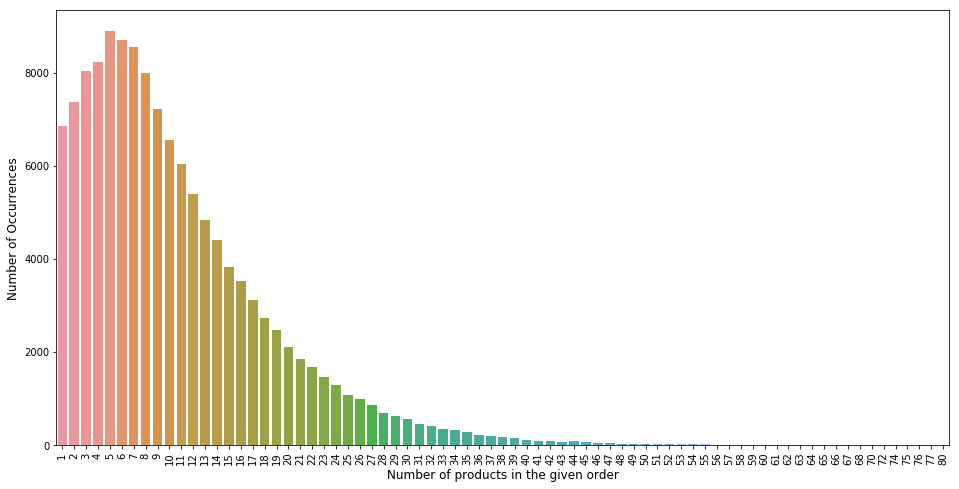

In [28]:
comb_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
count = comb_df.add_to_cart_order.value_counts()

plt.figure(figsize=(16,8))
sns.barplot(count.index, count.values, alpha=1)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

A right tailed distribution with the maximum value at 5.!

Before we explore the product details, let us look at the other three files as well.

In [29]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
products_df.shape

(49688, 4)

In [31]:
products_df.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [32]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [33]:
order_products_prior_df.shape

(32434489, 4)

In [34]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [35]:
order_products_prior_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [45]:
count = order_products_prior_df['product_name'].value_counts().reset_index()
count.columns = ['Product name', 'Number of occurences']
count.head(10)

,Product name,Number of occurences
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Wow. Most of them are organic products.! Also majority of them are fruits.

Now let us look at the important aisles.

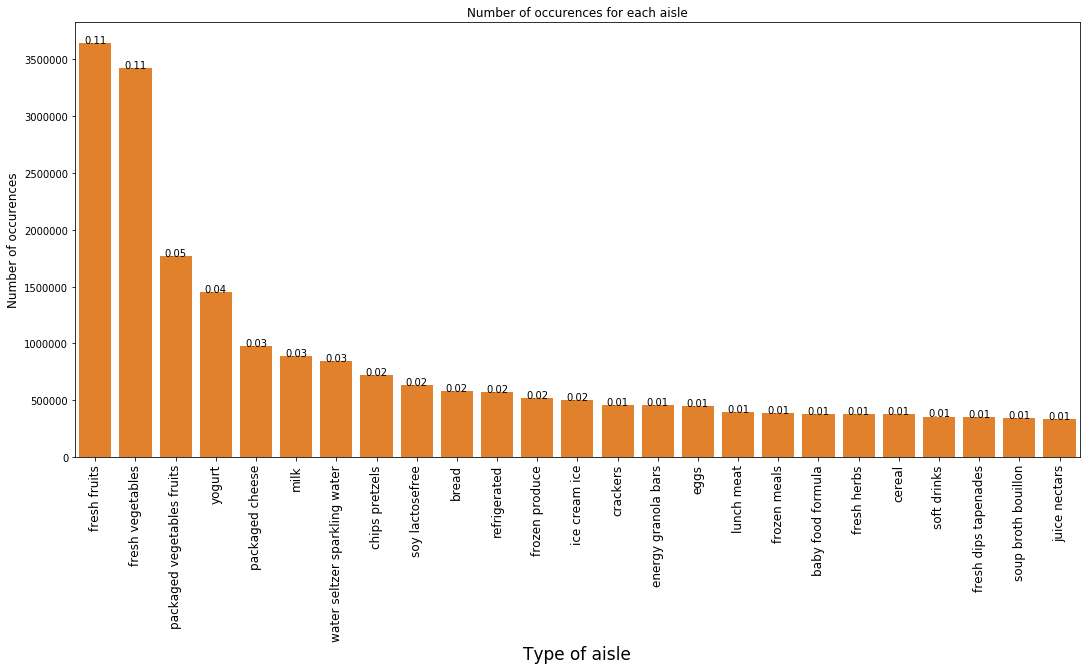

In [61]:
count = order_products_prior_df['aisle'].value_counts().head(25)
plt.figure(figsize = (18,8))
ax = sns.barplot(count.index, count.values, alpha = 1, color = color[1])
total = float(len(order_products_prior_df))
plt.ylabel('Number of occurences', fontsize = 12)
plt.xlabel('Type of aisle', fontsize = 17)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title('Number of occurences for each aisle', fontsize = 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 6,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

The top two aisles are fresh fruits and fresh vegetables.!

Department Distribution:

Let us now check the department wise distribution.

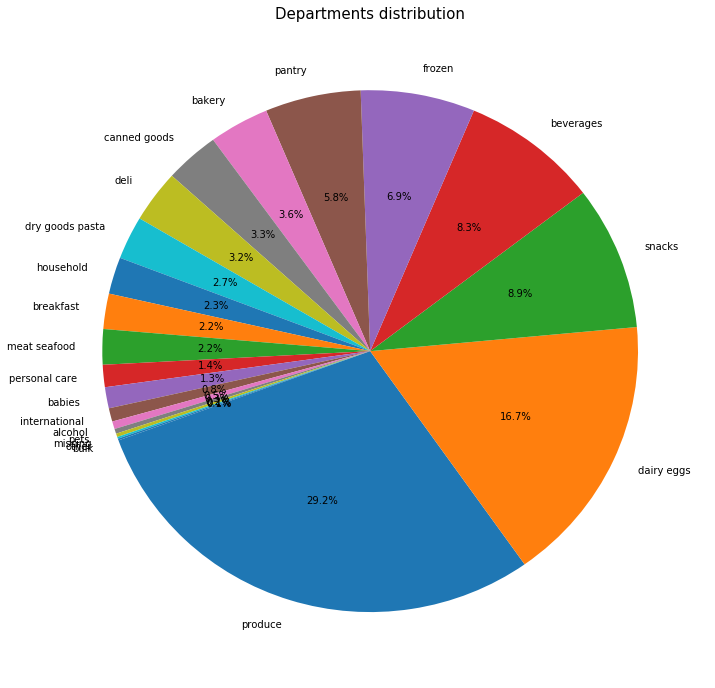

In [69]:
plt.figure(figsize = (12,12))
count = order_products_prior_df['department'].value_counts()
labels = (np.array(count.index))
size = (np.array(count/count.sum()) *100)

plt.pie(size, labels = labels, autopct = '%1.1f%%', startangle = 200)
plt.title('Departments distribution', fontsize = 15)
plt.show()

Produce is the largest department. Now let us check the reordered percentage of each department.

Department wise reorder ratio:

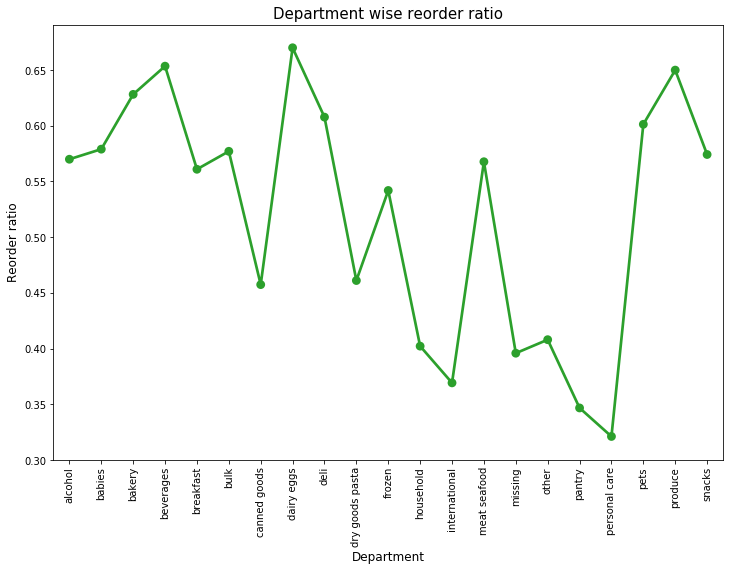

In [70]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.



#### Aisle - Reorder ratio:



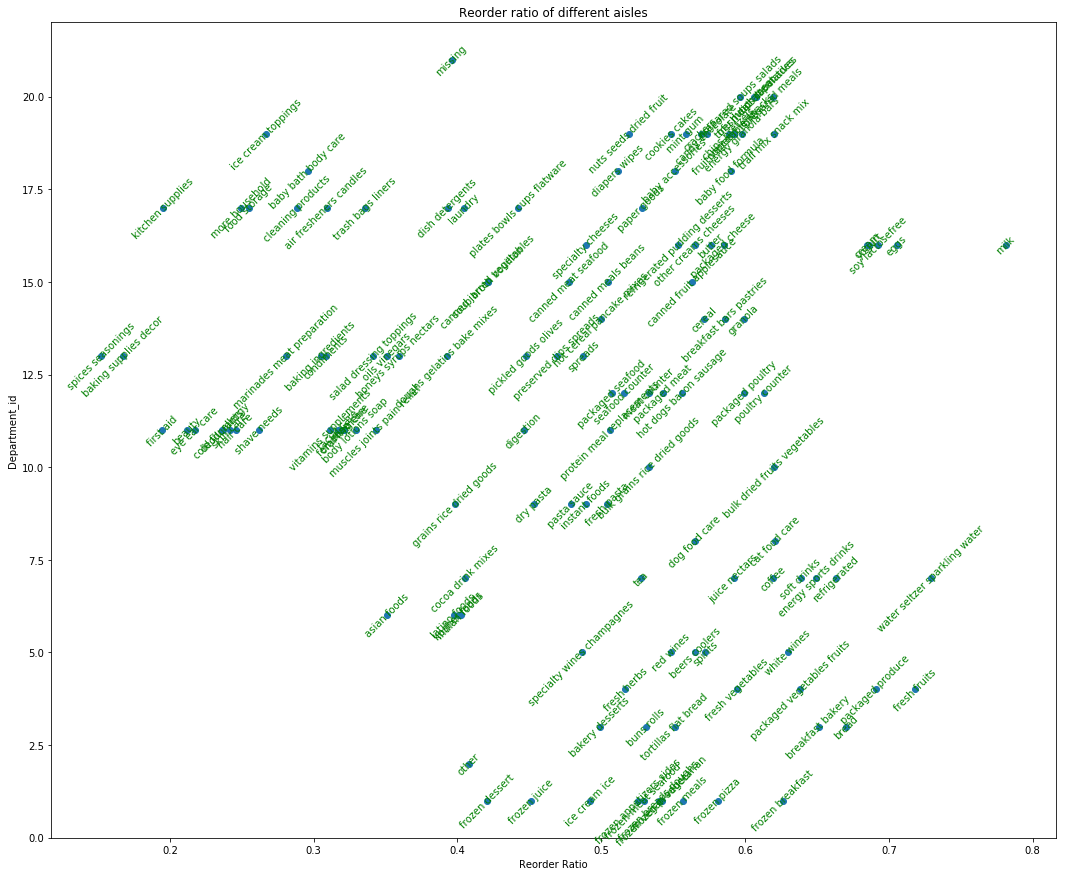

In [75]:
comb_df = order_products_prior_df.groupby(['department_id', 'aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(comb_df.reordered.values, comb_df.department_id.values)
for i, txt in enumerate(comb_df.aisle.values):
    ax.annotate(txt,(comb_df.reordered.values[i], comb_df.department_id.values[i]), 
                     rotation = 45, ha ='center', va = 'center',color = 'green')

plt.xlabel('Reorder Ratio')
plt.ylabel('Department_id')
plt.title('Reorder ratio of different aisles')
plt.show()

Milk aisle has highest number of reorder ratio and spices/kitchen supplies has the least

### Add to Cart - Reorder ratio:

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


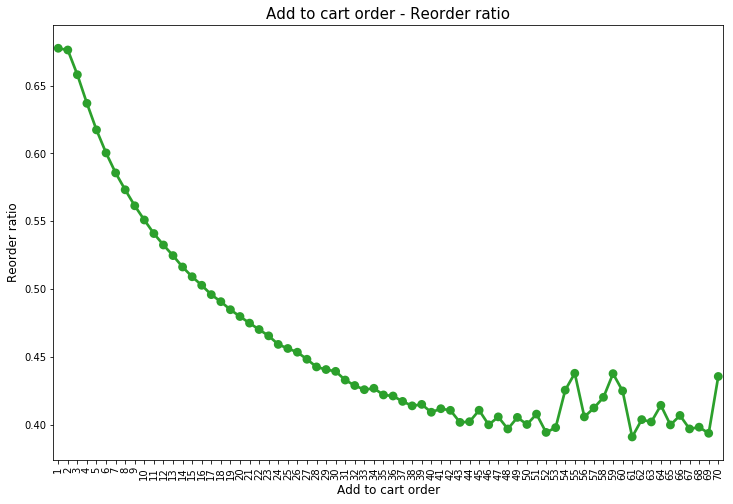

In [79]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

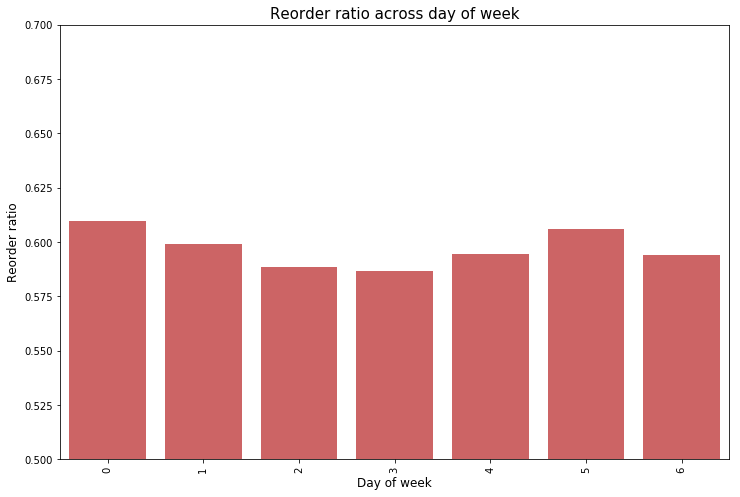

In [80]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()


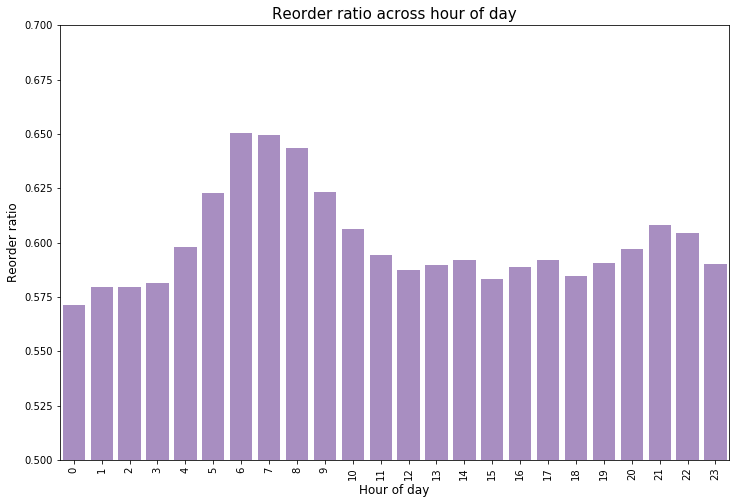

In [81]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

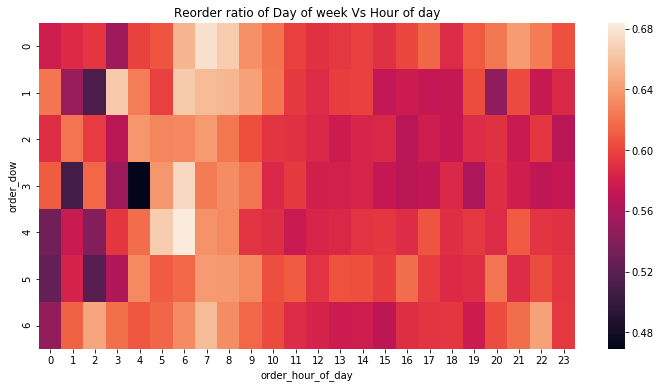

In [82]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()